<a href="https://colab.research.google.com/github/KiranJ9/Image-Classification/blob/main/Image_Classification(Proj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! rm -r ImageData

time: 130 ms (started: 2021-04-16 22:03:10 +00:00)


In [ ]:
#Check execution time
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.75 s (started: 2021-04-20 11:29:33 +00:00)


In [ ]:
!pip install xgboost

time: 2.64 s (started: 2021-04-20 11:29:38 +00:00)


In [ ]:
#Importing Data via Google Drive.
#Mounting the Google Drive and Uploading the ImageData folder on the drive.

time: 1.16 ms (started: 2021-04-18 07:52:54 +00:00)


In [ ]:

#Preprocessing the ImageData
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #To read the image
from skimage.transform import resize #Resizing the image

output = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/ImageData'
CATEGORIES = ['burgers','pizza','tasty pastas']
for category in CATEGORIES:
  num_class = CATEGORIES.index(category)
  print(num_class)
  path = os.path.join(DATADIR,category)
  print(path)
  for img in os.listdir(path):
    img_read = imread(os.path.join(path,img))
    print(img_read)
    resized_img = resize(img_read,(100,100,3))
    flat_data.append(resized_img.flatten())
    images.append(resized_img)
    output.append(num_class)
flat_data = np.array(flat_data)
output = np.array(output)
images = np.array(images)

Streaming output truncated to the last 5000 lines.
  [223 193 195]]]
[[[ 77 115  12]
  [ 67 105   6]
  [ 42  78   0]
  ...
  [220 215 211]
  [221 216 212]
  [212 207 203]]

 [[ 67 109   1]
  [ 52  93   0]
  [ 48  85   0]
  ...
  [209 204 200]
  [210 205 201]
  [203 198 194]]

 [[ 64 107   0]
  [ 45  87   0]
  [ 58  99   0]
  ...
  [199 194 190]
  [200 195 191]
  [198 193 189]]

 ...

 [[254 210 149]
  [251 215 131]
  [232 205 102]
  ...
  [232 232 230]
  [226 226 224]
  [218 218 216]]

 [[239 191 151]
  [241 206 114]
  [234 210  84]
  ...
  [233 233 231]
  [226 226 224]
  [220 220 218]]

 [[247 196 107]
  [222 173  81]
  [227 180  98]
  ...
  [245 245 243]
  [231 231 229]
  [231 231 229]]]
[[[151 180  72]
  [113 149  17]
  [139 181  35]
  ...
  [169   5   0]
  [172   9   0]
  [175  13   8]]

 [[122 149  54]
  [117 151  30]
  [113 154  16]
  ...
  [170  14   1]
  [174  16   5]
  [177  15  10]]

 [[ 95 119  35]
  [122 151  41]
  [129 166  35]
  ...
  [176  29  11]
  [180  26  14]
  [175 

In [ ]:
#import numpy as np
#flat_data = np.array(flat_data)
#resized_img = flat_data.reshape(-1,1)
#print(flat_data)

In [ ]:
flat_data.ndim

2

time: 6.63 ms (started: 2021-04-20 11:55:29 +00:00)


In [ ]:
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
len(output)

750

time: 5.35 ms (started: 2021-04-20 11:55:35 +00:00)


In [ ]:
import pandas as pd
df = pd.DataFrame(data = flat_data, 
                 index = output)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29960,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.942647,0.695588,0.427451,0.938725,0.695588,0.427451,0.937255,0.701961,0.427451,0.938725,0.705882,0.431373,0.941176,0.709314,0.447059,0.942647,0.709804,0.454902,0.945098,0.712745,0.456373,0.945098,0.713725,0.458824,0.945098,0.709804,0.460392,0.946569,0.709804,0.462745,0.944608,0.713725,0.466667,0.945098,0.717647,0.469608,0.946569,0.717647,0.474510,0.950490,...,0.555882,0.832843,0.707353,0.509804,0.821078,0.678431,0.470588,0.815196,0.676765,0.483137,0.764118,0.612353,0.423627,0.688431,0.516765,0.371078,0.653431,0.516176,0.414216,0.676078,0.570784,0.469804,0.718333,0.625392,0.523725,0.739902,0.651667,0.529020,0.745000,0.610882,0.446569,0.774020,0.627451,0.440196,0.760784,0.615686,0.397059,0.747353,0.577549,0.367941
0,0.925490,0.933333,0.929412,0.921569,0.929412,0.929412,0.921569,0.929412,0.925490,0.921569,0.929412,0.925490,0.917647,0.925490,0.921569,0.917647,0.925490,0.917647,0.913725,0.921569,0.913725,0.909804,0.917647,0.913725,0.905882,0.909804,0.909804,0.901961,0.905882,0.909804,0.894118,0.905882,0.909804,0.886275,0.905882,0.909804,0.882353,0.901961,0.901961,0.874510,...,0.909804,0.941176,0.937255,0.917647,0.945098,0.941176,0.917647,0.945098,0.941176,0.921569,0.949020,0.945098,0.921569,0.949020,0.945098,0.921569,0.949020,0.945098,0.921569,0.949020,0.945098,0.921569,0.949020,0.949020,0.925490,0.949020,0.949020,0.925490,0.949020,0.949020,0.925490,0.949020,0.949020,0.929412,0.952941,0.949020,0.929412,0.952941,0.949020,0.929412
0,0.082353,0.043137,0.039216,0.086275,0.047059,0.043137,0.094118,0.054902,0.050980,0.109804,0.062745,0.050980,0.121569,0.062745,0.043137,0.121569,0.058824,0.054902,0.113725,0.054902,0.055686,0.094118,0.047843,0.047059,0.082353,0.043137,0.039216,0.082353,0.043137,0.039216,0.082353,0.043137,0.039216,0.082353,0.043137,0.039216,0.086275,0.047059,0.043137,0.094902,...,0.058824,0.152941,0.098039,0.062745,0.160784,0.101961,0.069804,0.203922,0.129412,0.101961,0.156078,0.086275,0.054902,0.156863,0.098039,0.065882,0.160784,0.102745,0.070588,0.200784,0.122353,0.094902,0.315294,0.204706,0.145882,0.440000,0.323137,0.255686,0.141176,0.090980,0.075294,0.074510,0.035294,0.031373,0.094118,0.054902,0.050980,0.121569,0.082353,0.078431
0,0.141176,0.133333,0.113725,0.139196,0.133333,0.113725,0.135275,0.129412,0.109804,0.135275,0.125490,0.105882,0.139196,0.125490,0.105882,0.145098,0.125490,0.101961,0.141176,0.121569,0.098039,0.141176,0.121569,0.098039,0.141176,0.121569,0.098039,0.145098,0.121569,0.101961,0.156863,0.125490,0.113725,0.160784,0.129412,0.117647,0.160784,0.133333,0.117647,0.160784,...,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569,0.141176,0.117647,0.121569
0,0.984314,0.867941,0.900608,0.984314,0.844412,0.881000,0.984314,0.822176,0.853529,0.972549,0.802569,0.818235,0.975157,0.683647,0.722863,0.968627,0.500667,0.568627,0.933353,0.155588,0.164725,0.911118,0.009157,0.009157,0.925490,0.022235,0.007843,0.967314,0.036608,0.000000,0.984314,0.065353,0.000000,0.988235,0.151627,0.001314,0.986922,0.233980,0.033980,0.980392,...,0.745098,0.867980,0.820922,0.758176,0.864059,0.818314,0.754255,0.844431,0.793451,0.695412,0.875804,0.822216,0.725471,0.878431,0.853588,0.767314,0.892804,0.867961,0.820902,0.704569,0.674510,0.606529,0.766020,0.732039,0.656216,0.796078,0.768627,0.694118,0.820922,0.793471,0.718961,0.815686,0.788235,0.721569,0.792157,0.756863,0.682353,0.809157,0.773863,0.711118


time: 128 ms (started: 2021-04-20 11:55:37 +00:00)


In [ ]:
#df['df'].value_counts()

time: 983 µs (started: 2021-04-20 11:55:40 +00:00)


In [ ]:
x=flat_data
y=output

time: 1.45 ms (started: 2021-04-20 12:17:48 +00:00)


In [ ]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([250, 250, 250]))

time: 5.95 ms (started: 2021-04-20 12:17:51 +00:00)


<BarContainer object of 3 artists>

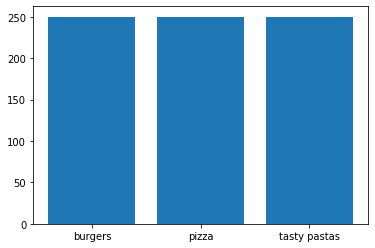

time: 143 ms (started: 2021-04-20 12:17:52 +00:00)


In [ ]:
unique, count = np.unique(output,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
import numpy as np
np.unique(x,return_counts=True)

(array([0.00000000e+00, 2.29215686e-04, 2.71156863e-03, ...,
        9.75774706e-01, 9.76470588e-01, 9.80392157e-01]),
 array([21,  1,  1, ...,  1,  1,  1]))

time: 12.1 ms (started: 2021-04-20 12:18:00 +00:00)


In [ ]:
#Splitting the data for Training and Testing
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
x, y = make_hastie_10_2(random_state=10)
x_train, x_test = x[:5000], x[5000:]
y_train, y_test = y[:5000], y[5000:]
clf = GradientBoostingClassifier(n_estimators=655, learning_rate=1.0,loss = 'exponential',
      max_depth=1, random_state=42).fit(x_train, y_train)

time: 4.89 s (started: 2021-04-20 13:21:00 +00:00)


In [ ]:
clf.score(x_test, y_test)

0.9662857142857143

time: 33.6 ms (started: 2021-04-20 13:21:07 +00:00)


In [ ]:
accuracy = clf.score(x_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.63%
time: 30.4 ms (started: 2021-04-20 13:21:12 +00:00)


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5000, 10) (7000, 10) (5000,) (7000,)
time: 1.3 ms (started: 2021-04-20 13:24:45 +00:00)


In [ ]:
x.shape

(12000, 10)

time: 4.15 ms (started: 2021-04-20 13:24:47 +00:00)


In [ ]:
y.shape

(12000,)

time: 4.02 ms (started: 2021-04-20 13:24:48 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 7.13 ms (started: 2021-04-20 13:24:50 +00:00)


In [ ]:
import numpy as np
np.unique(y_test,return_counts=True)

(array([-1.,  1.]), array([3523, 3477]))

time: 5.98 ms (started: 2021-04-20 13:24:51 +00:00)


In [ ]:
np.unique(y_test,return_counts=True)

(array([-1.,  1.]), array([3523, 3477]))

time: 11.9 ms (started: 2021-04-20 13:24:53 +00:00)


In [ ]:
y_test

array([-1.,  1.,  1., ...,  1., -1.,  1.])

time: 6.38 ms (started: 2021-04-20 13:24:54 +00:00)


In [ ]:
#Saving model using Pickle library
import pickle
pickle.dump(model,open('img_model.p','wb'))

time: 200 ms (started: 2021-04-20 13:24:56 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 259 ms (started: 2021-04-20 13:24:58 +00:00)


Enter the image URLhttps://pbs.twimg.com/media/Ey9GMDSXMAcswu3.jpg
(675, 1200, 3)
Prediction:pizza


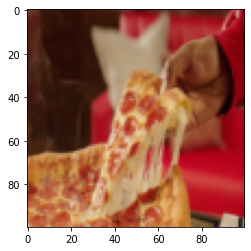

time: 4.74 s (started: 2021-04-20 13:26:53 +00:00)


In [ ]:
#Testing 
flat_data = []
url = input('Enter the image URL')
img = imread(url)
resized_img = resize(img,(100,100,3))
flat_data.append(resized_img.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(resized_img)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Prediction:{y_out}')